In [ ]:
from typing import List # Can use list instead (py >= 3.9)

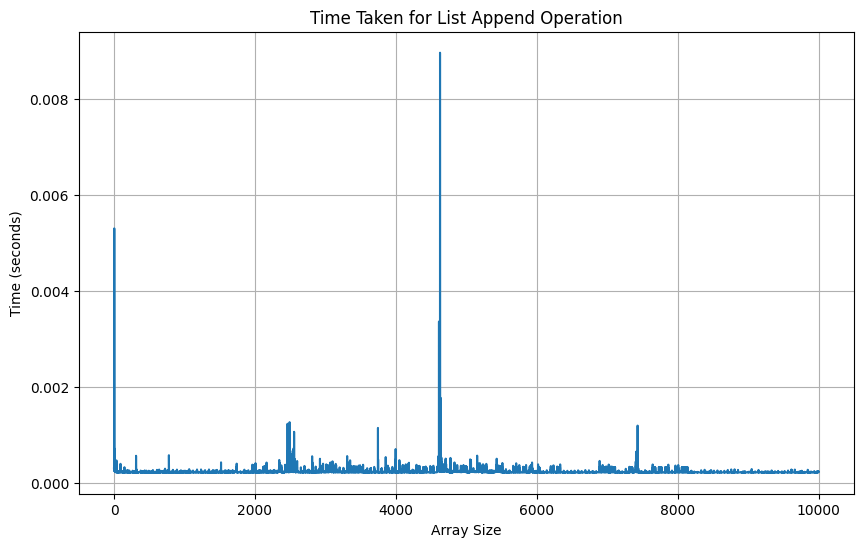

In [ ]:
# Implementation with timeit

import timeit
import matplotlib.pyplot as plt
import numpy as np

number = 10000
append_times = []
iteration_indices = []

for i in range(0, number):  # Amortized O(1)
    iteration_indices.append(i)
    setup = f"test_array = list(range({i}))"
    t = timeit.timeit(stmt="test_array.append(1)", setup=setup, number=10000)
    append_times.append(t) 


plt.figure(figsize=(10, 6))
plt.plot(iteration_indices, append_times)
plt.title("Time Taken for List Append Operation")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()


In [ ]:
# Contains duplicate

# O(n^2) solution

class Solution:
    def contains_duplicate1(self, nums: list[int]) -> bool:
        check = []
        for num in nums: # O(n) operation
            if num not in check: # O(n) operation
                check.append(num) # O(1) operation
            else:
                return True
        return False

# O(n^2) solution

class Solution:
    def contains_duplicate2(self, nums: list[int]) -> bool:
        for i in range(len(nums)): # O(n)
            for j in (i+1, len(nums)): # O(n)
                if nums[i] == nums[j]: # O(1)
                    return True
        return False

# O(n) solution
class Solution:
    def contains_duplicate3(self, nums: List[int]) -> bool:
        nums.sort() # O(n*log(n))
        for i in range(1, len(nums)): # O(n)
            if nums[i] == nums[i - 1]:
                return True
        return False

# O(n) solution
class Solution:
    def contains_duplicate4(self, nums: list[int]) -> bool:
        seen = set()
        for num in nums:
            if num in seen:
                return True
            seen.add(num)
        return False

# O(n) solution
class Solution:
    def contains_duplicate5(self, nums: List[int]) -> bool:
        return len(set(nums)) < len(nums)
            

In [ ]:
# Valid Anagram

class Solution:
    def isAnagram1(self, s: str, t: str) -> bool:
        if len(s) != len(t): # O(1)
            return False
        
        return sorted(s) == sorted(t) # sort: O(nlog(n)) compare: O(n)
    
    def isAnagram2(self, s:str, t:str) -> bool:
        if len(s) != len(t):
            return False
        count_s = {}
        count_t = {}

        for i in range(len(t)): # O(n)
            count_s[s[i]] = count_s.get(s[i], 0) # O(1)
            count_t[t[i]] = count_t.get(t[i], 0) # O(1)
        
        return count_s == count_t # O(n)
    
    def isAnagram3(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False
        
        count = [0] * 26
        for i in range(len(s)):
            count[ord(s[i]) - ord('a')] += 1
            count[ord(t[i]) - ord('a')] -= 1
        
        for val in count:
            if val != 0:
                return False
            
        return True
    


In [ ]:
# Two sum

# O(n^2) Solution

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        for i, num in enumerate(nums): # O(n)
            check = target - num
            for j, num in enumerate(nums): # O(n)
                if num == check and i!=j:
                    return [i,j]
    
    # Still O(n^2) but half the time as n -> infty

    def twoSum2(self, nums: List[int], target: int) -> List[int]:
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                if nums[i] + nums[j] == target:
                    return [i,j]
    
    # O(n) time complexity

    def twoSum3(self, nums: List[int], target: int) -> List[int]:
        seen = {}
        for i, num in enumerate(nums): # O(n)
            check = target - num
            if check in seen: # O(1)
                return [i, seen[check]]
            seen[num] = i

In [3]:
# Sort a string

word = "word"
print(f"Sorting the word: {word}\nProduces the list: {sorted(word)}")
test_1 = ' '.join(sorted(word)) # Join with a space between letters
test_2 = ''.join(sorted(word))
print(test_1)
print(test_2)


Sorting the word: word
Produces the list: ['d', 'o', 'r', 'w']
d o r w
dorw


In [7]:
print(ord("a"))
print(ord("c"))
print(ord("c")-ord("a"))

97
99
2


In [ ]:
from collections import defaultdict
# Group anagrams

# O(m*nlog(n))
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        check = defaultdict(list)
        for word in strs: # O(m)
            sorted_key = ''.join(sorted(word)) # O(n) + O(n*log(n)) = O(n*log(n))
            check[sorted_key].append(word) # O*(1) + O*(1) = O*(1)
        return list(check.values())
    
    def groupAnagrams2(self, strs: List[str]) -> List[List[str]]:
        check = defaultdict(list)
        for word in strs:
            count = [0] * 26
            for c in word:
                count[ord(c)-ord('a')] += 1
            check[tuple(count)].append(word)
            return list(check.values())

In [ ]:
# Top k frequent elements

class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        check = {}
        for num in nums:
            check[num] = check.get(num, 0) + 1
        
        items = []
        for key, value in check.items():
            inserted = False
            for i in range(len(items)):
                if value > check[items[i]]:
                    items.insert(i, key)
                    inserted = True
                    break
            if not inserted and len(items) < k:
                items.append(key)
            
            if len(items) > k:
                items.pop()

        return items

# Heaps – Key Aspects

## 1. What Is a Heap?
- **Tree** satisfying the **heap property**  
  - **Min-heap**: parent ≤ children  
  - **Max-heap**: parent ≥ children  
- Always a **complete binary tree** (filled left-to-right)

## 2. Array Representation
- For node at index `i`:  
  - Left child → `2*i + 1`  
  - Right child → `2*i + 2`  
  - Parent → `(i - 1)//2`

## 3. Core Operations & Complexity
| Operation       | Description                       | Time        |
|-----------------|-----------------------------------|-------------|
| `heapify(list)` | Build heap in-place               | O(n)        |
| `heappush(h,x)` | Insert element                    | O(log n)    |
| `heappop(h)`    | Remove root (min or max)          | O(log n)    |
| Peek at root    | Access smallest/largest element   | O(1)        |

## 4. Python’s `heapq` (Min-Heap)
```python
import heapq

lst = [9,4,7,1,5,3]
heapq.heapify(lst)       # [1,4,3,9,5,7]
heapq.heappush(lst,2)    # [1,2,3,9,5,7,4]
smallest = heapq.heappop(lst)


In [11]:
import heapq

maxh = []
# Max-Heap
list = [3,6,1,8]
for v in list:
    heapq.heappush(maxh, -v)

print(maxh) # Need to retrieve values with -
max_val = -heapq.heappop(maxh)
print(max_val)



[-8, -6, -1, -3]
8


In [ ]:
# Top K-elements
largest = heapq.nlargest(3, maxh) # Large first
smallest = heapq.nsmallest(3, maxh) # Small first
print(f"Largest: {largest}\nSmallest: {smallest}")

Largest: [-1, -3, -6]
Smallest: [-6, -3, -1]


In [15]:
# get 3 largest originals:
top3 = heapq.nsmallest(3, maxh)      
top3_original = [-x for x in top3]  
top3_original

[6, 3, 1]